### **Dimensionality reduction techniques aim to reduce the number of features in a dataset while preserving its essential information and structure. By projecting high-dimensional data onto lower-dimensional spaces, dimensionality reduction facilitates data exploration, visualization, and analysis. Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Uniform Manifold Approximation and Projection (UMAP) are some popular dimensionality reduction techniques used for visualizing high-dimensional data.**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('diabetes_data.csv')
data.head(10)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [4]:
data.dtypes


,0
pregnancies,int64
glucose,int64
diastolic,int64
triceps,int64
insulin,int64
bmi,float64
dpf,float64
age,int64
diabetes,int64


In [5]:
data.isnull().sum()

,0
pregnancies,0
glucose,0
diastolic,0
triceps,0
insulin,0
bmi,0
dpf,0
age,0
diabetes,0


In [6]:
data.shape

(768, 9)

In [7]:
data.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Exploratory Data Analysis(EDA)

In [8]:
data.corr()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


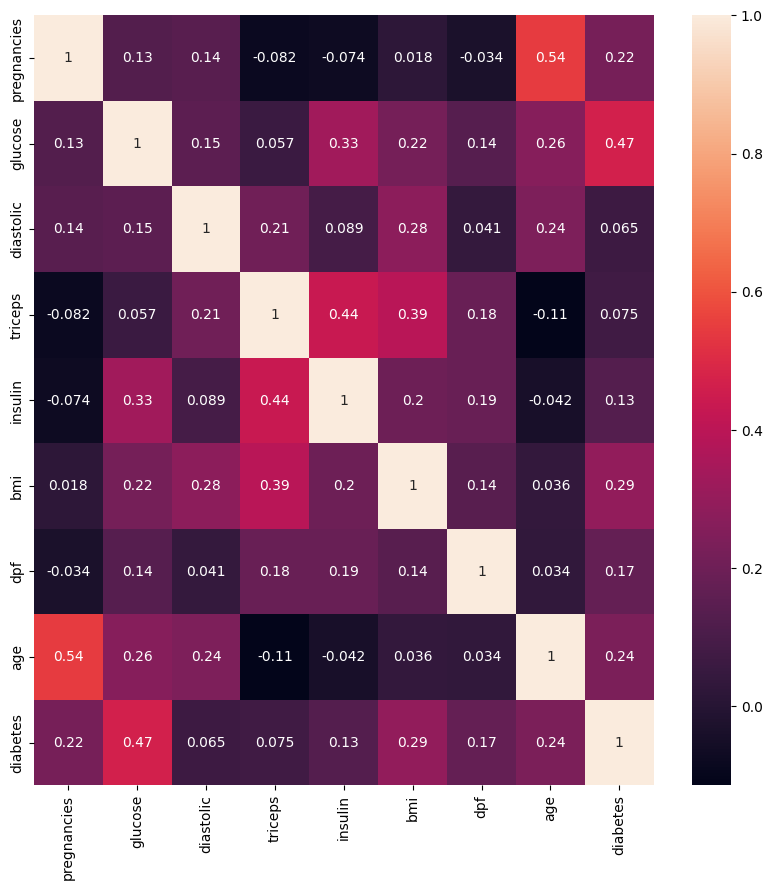

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()


Observation--No two feature are highly correlated so we have to consider all

In [10]:
data.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**DATA IMPUTATION**

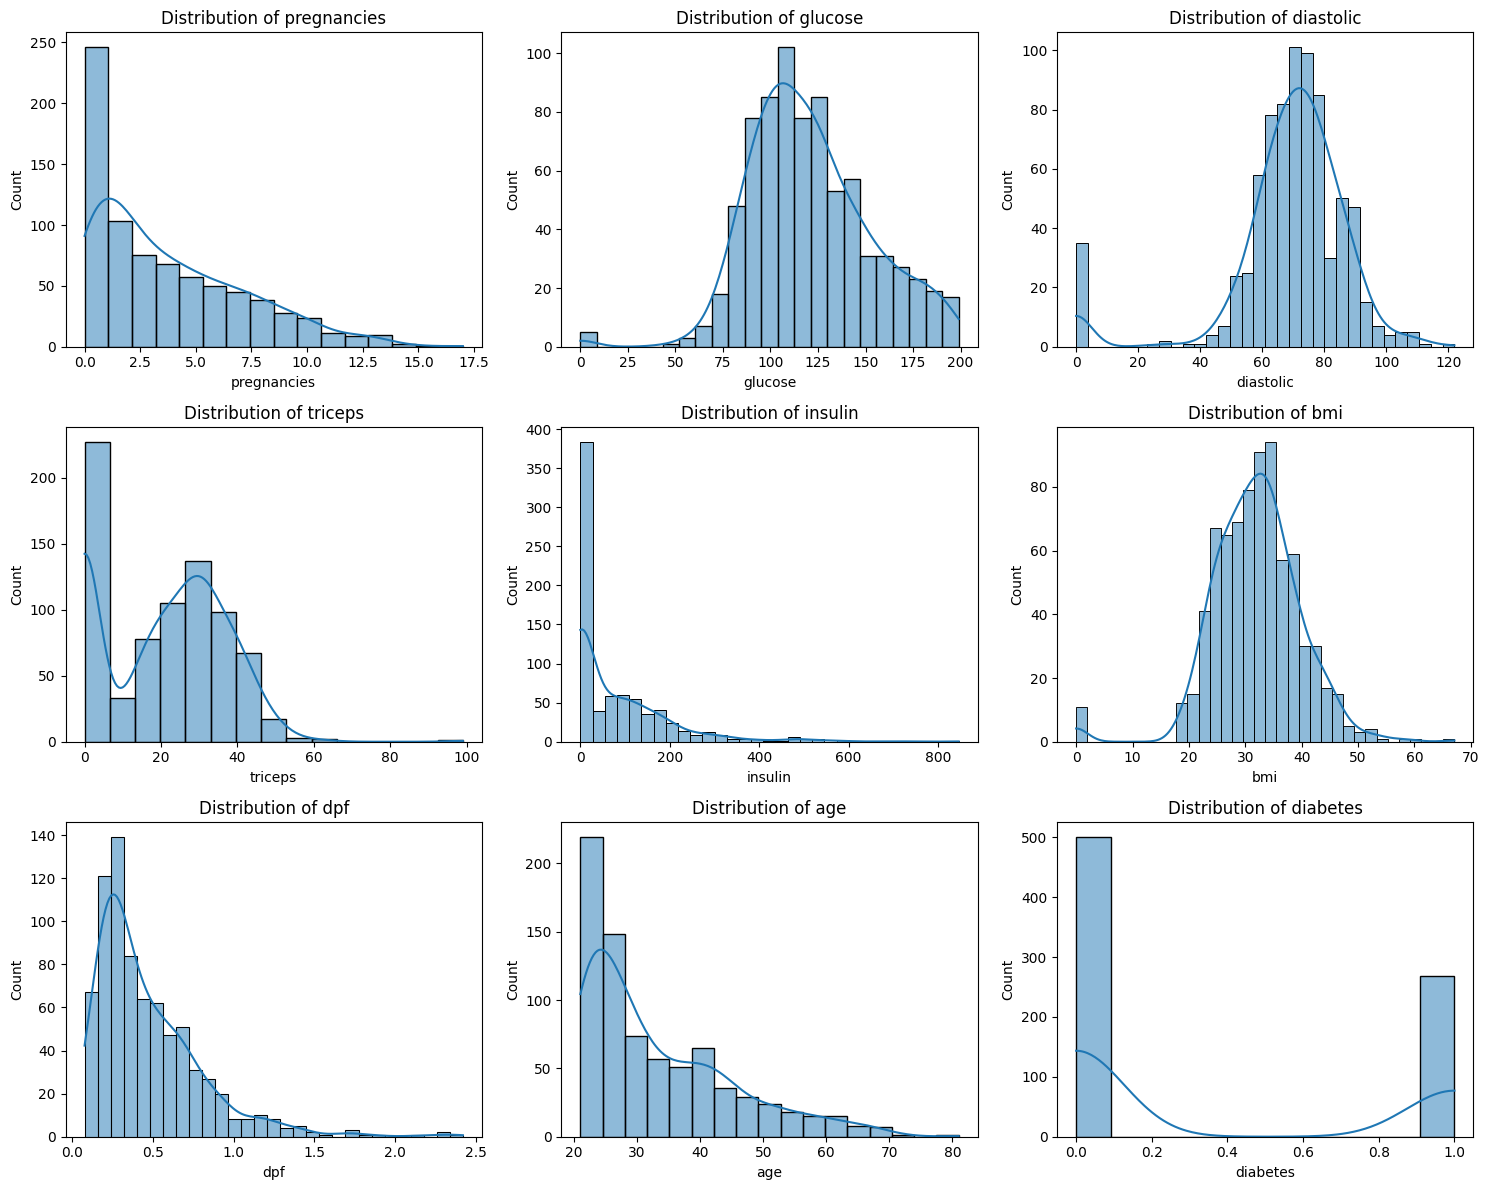

In [11]:
numeric_cols=data.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,12))
for i,col in enumerate(numeric_cols,1):
  plt.subplot(3,3,i)
  sns.histplot(data[col],kde=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [12]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [13]:
#as insulin is non-symmetric(right skewed distribution) we sholuld take median
data['insulin']=data['insulin'].replace(0,data['insulin'].median())

In [14]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [15]:
data['pregnancies'] = data['pregnancies'].replace(0, data['pregnancies'].median())
data['glucose'] = data['glucose'].replace(0, data['glucose'].mean())
data['diastolic'] = data['diastolic'].replace(0, data['diastolic'].mean())
data['triceps'] = data['triceps'].replace(0, data['triceps'].mean())
data['bmi'] = data['bmi'].replace(0, data['bmi'].mean())
data['dpf'] = data['dpf'].replace(0, data['dpf'].median())
data['age'] = data['age'].replace(0, data['age'].median())
data['diabetes'] = data['diabetes'].replace(0, data['diabetes'].mean())


In [16]:
data.head(20)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.000000,35.000000,30.5,33.600000,0.627,50,1.000000
1,1,85.0,66.000000,29.000000,30.5,26.600000,0.351,31,0.348958
2,8,183.0,64.000000,20.536458,30.5,23.300000,0.672,32,1.000000
3,1,89.0,66.000000,23.000000,94.0,28.100000,0.167,21,0.348958
4,3,137.0,40.000000,35.000000,168.0,43.100000,2.288,33,1.000000
5,5,116.0,74.000000,20.536458,30.5,25.600000,0.201,30,0.348958
6,3,78.0,50.000000,32.000000,88.0,31.000000,0.248,26,1.000000
7,10,115.0,69.105469,20.536458,30.5,35.300000,0.134,29,0.348958
8,2,197.0,70.000000,45.000000,543.0,30.500000,0.158,53,1.000000
9,8,125.0,96.000000,20.536458,30.5,31.992578,0.232,54,1.000000


**Part2- Outlier detection and Normalization**

In [17]:
x=data.drop(columns='diabetes',axis=1)#drop the target column
y=data['diabetes']

In [18]:
#convert sata into Standard Scaler form
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataScaled=scaler.fit_transform(data)

In [19]:
dataScaled=pd.DataFrame(dataScaled)
dataScaled.head()

,0,1,2,3,4,5,6,7,8
0,0.570070,0.865276,-0.021044,0.872057,-0.608201,0.167255,0.468492,1.425995,1.365896
1,-1.085807,-1.205989,-0.516583,0.248678,-0.608201,-0.851535,-0.365061,-0.190672,-0.732120
2,1.232421,2.015979,-0.681762,-0.630654,-0.608201,-1.331821,0.604397,-0.105584,1.365896
3,-1.085807,-1.074480,-0.516583,-0.374700,-0.006185,-0.633222,-0.920763,-1.041549,-0.732120
4,-0.423456,0.503626,-2.663916,0.872057,0.695378,1.549899,5.484909,-0.020496,1.365896


In [20]:
dataScaled.describe()

,0,1,2,3,4,5,6,7,8
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.063964e-16,-1.595946e-16,1.156482e-17,2.868076e-16,2.602085e-17,-3.168762e-16,2.174187e-16,1.931325e-16,1.434038e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.085807e+00,-2.553955e+00,-3.985352e+00,-2.037044e+00,-7.646304e-01,-2.074083e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-7.546315e-01,-7.210503e-01,-6.817623e-01,-6.306536e-01,-6.082010e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-4.234561e-01,-1.539182e-01,-2.104440e-02,-3.747004e-01,-6.010905e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,5.700702e-01,6.104773e-01,6.396735e-01,5.603676e-01,3.090444e-01,6.038797e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,4.213000e+00,2.542014e+00,4.108443e+00,7.521430e+00,7.123206e+00,5.042893e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [21]:
dataScaled.shape

(768, 9)

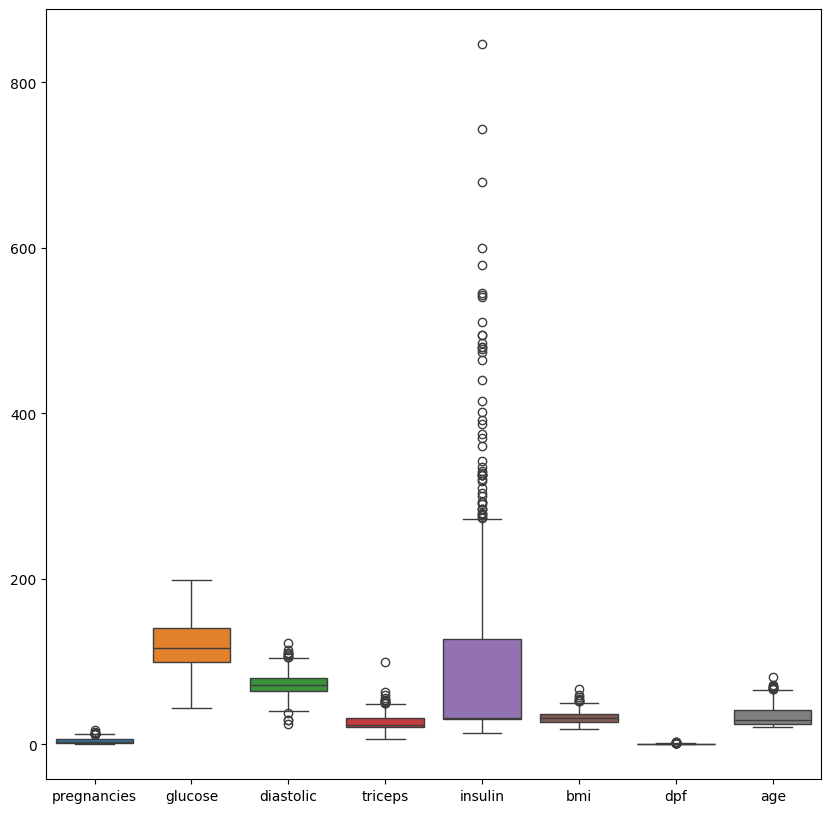

In [22]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x,ax=ax)
plt.savefig('boxplot.jpg')

In [23]:

x.shape

(768, 8)

In [24]:
y.shape

(768,)

In [25]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [26]:
cols = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi','dpf', 'age']
for col in cols:
  Q1=x[col].quantile(0.25)#find value for Q1
  Q3=x[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  mask=(x[col]>=lower_bound)&(x[col]<=upper_bound)#these lies for true value


In [27]:

x_outlier_detection=x[mask]
y_outlier_detection=y[mask]

In [28]:
x_outlier_detection.shape

(759, 8)

In [29]:

y_outlier_detection.shape

(759,)

**STANDARDIZATION**

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_outlier_detection)

<Axes: >

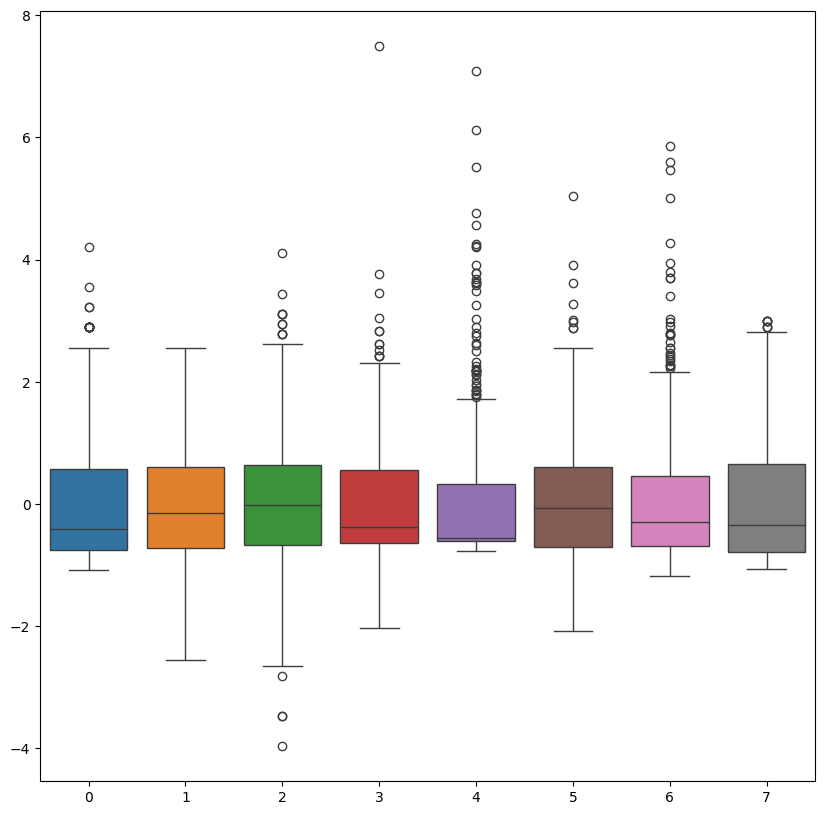

In [31]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled,ax=ax)



In [32]:
cols=['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']

In [33]:
type(x_scaled)

numpy.ndarray

In [34]:
dataScaled.describe()

,0,1,2,3,4,5,6,7,8
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.063964e-16,-1.595946e-16,1.156482e-17,2.868076e-16,2.602085e-17,-3.168762e-16,2.174187e-16,1.931325e-16,1.434038e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.085807e+00,-2.553955e+00,-3.985352e+00,-2.037044e+00,-7.646304e-01,-2.074083e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-7.546315e-01,-7.210503e-01,-6.817623e-01,-6.306536e-01,-6.082010e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-4.234561e-01,-1.539182e-01,-2.104440e-02,-3.747004e-01,-6.010905e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,5.700702e-01,6.104773e-01,6.396735e-01,5.603676e-01,3.090444e-01,6.038797e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,4.213000e+00,2.542014e+00,4.108443e+00,7.521430e+00,7.123206e+00,5.042893e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [35]:
dataScaled.shape

(768, 9)

In [36]:
covarianceMatrix=dataScaled.T @dataScaled/767
covarianceMatrix

,0,1,2,3,4,5,6,7,8
0,1.001304,0.149123,0.246710,0.038602,-0.059657,0.080643,-0.016172,0.538871,0.245786
1,0.149123,1.001304,0.219952,0.160975,0.357546,0.231779,0.137285,0.266947,0.493551
2,0.246710,0.219952,1.001304,0.134330,-0.022078,0.281598,0.000372,0.327166,0.163199
3,0.038602,0.160975,0.134330,1.001304,0.274611,0.536402,0.155163,0.026457,0.175254
4,-0.059657,0.357546,-0.022078,0.274611,1.001304,0.189277,0.178261,-0.015433,0.148651
5,0.080643,0.231779,0.281598,0.536402,0.189277,1.001304,0.153708,0.025782,0.312661
6,-0.016172,0.137285,0.000372,0.155163,0.178261,0.153708,1.001304,0.033605,0.174071
7,0.538871,0.266947,0.327166,0.026457,-0.015433,0.025782,0.033605,1.001304,0.238667
8,0.245786,0.493551,0.163199,0.175254,0.148651,0.312661,0.174071,0.238667,1.001304


In [37]:
#now find the number of eigenvalue and eigenvector
eigenValues,eigenVectors=np.linalg.eig(covarianceMatrix)

In [38]:
eigenValues

array([2.55258913, 1.64889815, 1.11539666, 0.89116726, 0.78870978,
       0.74887221, 0.47902393, 0.38733737, 0.39973955])

In [39]:
eigenVectors

array([[ 0.28529465,  0.50069838,  0.03623946,  0.16088604,  0.3331986 ,
         0.33867387,  0.47813327,  0.38521075,  0.19491139],
       [ 0.42755278, -0.03669999, -0.4165984 , -0.33803607, -0.18289148,
        -0.13188401, -0.32093123,  0.32019202,  0.52121651],
       [ 0.31322691,  0.25215655,  0.38715607, -0.09672246, -0.20030812,
        -0.72127362,  0.16583657,  0.17155269, -0.24853539],
       [ 0.3292894 , -0.36313107,  0.43074619,  0.04613477,  0.30251737,
         0.23910692, -0.4476527 ,  0.38813287, -0.26889529],
       [ 0.24808826, -0.38926429, -0.34973602, -0.27741483,  0.57056468,
        -0.22305829,  0.36951666, -0.17938206, -0.20888205],
       [ 0.3891425 , -0.28590395,  0.46549275,  0.00729488, -0.15742497,
         0.14227161,  0.23935045, -0.48350143,  0.46260591],
       [ 0.1893663 , -0.25079536, -0.26998517,  0.86823459, -0.06373803,
        -0.2488528 ,  0.01969653,  0.06795051,  0.05935753],
       [ 0.31764166,  0.50594478, -0.07970577,  0.12068664,  0

Evaluating the Principal Components

In [40]:
PC1_data=dataScaled @ eigenVectors[:,0]
PC1_data
#matrix multiplication of data and eigenvector

,0
0,1.847767
1,-1.827475
2,0.782825
3,-2.117718
4,1.933798
...,...
763,1.626867
764,-0.714549
765,-0.912173
766,-0.177453


In [41]:
PC2_data=dataScaled @ eigenVectors[:,1]
PC2_data

,0
0,0.750562
1,-0.258580
2,1.038658
3,-0.624927
4,-3.292719
...,...
763,1.405966
764,-0.566945
765,0.465691
766,0.470841


In [42]:
PC3_data=dataScaled @ eigenVectors[:,7]
PC3_data

,0
0,0.002514
1,-0.133258
2,1.489316
3,-0.125648
4,-0.730978
...,...
763,-0.111352
764,-0.176685
765,0.512730
766,-1.293344


PCA Implementation via sklearn library

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(dataScaled)
#the values of PCA components cimputer here is same as one done above separately

array([[ 1.84776673,  0.7505618 ],
       [-1.82747519, -0.25857986],
       [ 0.78282472,  1.03865837],
       ...,
       [-0.91217272,  0.46569103],
       [-0.17745332,  0.47084121],
       [-1.56470978, -0.73563788]])

In [48]:
from sklearn.decomposition import PCA
pca=PCA()
principalComponent=pca.fit_transform(dataScaled)

In [49]:
#helps to get the optimal component to get the best data from the dataset
pca.explained_variance_ratio_

array([0.28325172, 0.18297235, 0.12377159, 0.09888965, 0.08752031,
       0.08309968, 0.05315558, 0.04435767, 0.04298145])

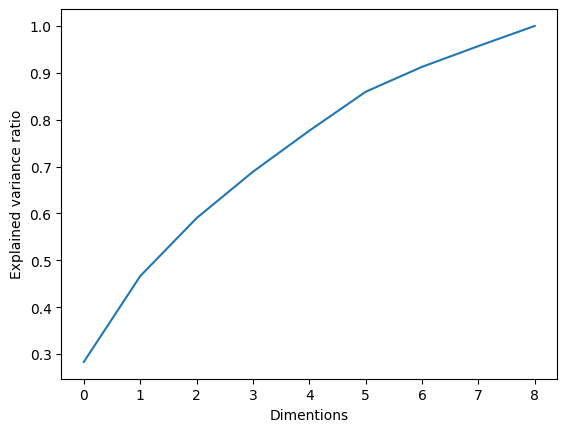

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimentions")
plt.ylabel("Explained variance ratio")
plt.show()
#we have to take the principal component of those values where 90  percent of out data is underlying